In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from scipy import linalg as la

Data upload & initialize constants

In [2]:
df = pd.read_excel('Phase III Combinder_CAD+TS (Mar-August 2018) - Modified RCT.xlsm', sheet_name='CAD_TS_Combined')


In [6]:
df = df.drop_duplicates(subset=['Call ID Number'])
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])
df['Date'] = df['Timestamp'].dt.date
df

,Call ID Number,Call Received Time,Call Type,Call Address,Status Time Stamp,Status,Unit Number,Timestamp,Date
0,180042928,2018-03-01 14:33:27,PI Accident,8200 S I15 NB ...,2018-03-01 16:05:59,CMPLT,328,2018-03-01 14:33:27,2018-03-01
21,180042961,2018-03-01 15:12:48,PD Accident,10700 S I15 NB ...,2018-03-01 16:31:54,CMPLT,T294,2018-03-01 15:12:48,2018-03-01
35,180042962,2018-03-01 15:13:37,PD Accident,281917 I15 SB ...,2018-03-01 16:36:20,CMPLT,515,2018-03-01 15:13:37,2018-03-01
45,180043022,2018-03-01 16:28:31,PD Accident,376 N I215W NB ...,2018-03-01 16:41:53,CMPLT,T296,2018-03-01 16:28:31,2018-03-01
51,180043029,2018-03-01 16:33:49,PD Accident,1700 S I215W SB ...,2018-03-01 18:34:34,CMPLT,86,2018-03-01 16:33:49,2018-03-01
...,...,...,...,...,...,...,...,...,...
15146,180172842,2018-08-31 09:35:15,PI Accident,1135 E I215S WB ...,2018-08-31 11:42:19,CMPLT,T294,2018-08-31 09:35:15,2018-08-31
15184,180173017,2018-08-31 12:51:51,PD Accident,I15 SB 11400 S OFR EB ...,2018-08-31 14:39:45,CMPLT,T294,2018-08-31 12:51:51,2018-08-31
15196,180173051,2018-08-31 13:25:53,PD Accident,6000 S I15 SB ...,2018-08-31 14:57:58,CMPLT,556,2018-08-31 13:25:53,2018-08-31
15206,180173088,2018-08-31 14:12:19,PD Accident,10000 S I15 SB ...,2018-08-31 15:03:13,CMPLT,508,2018-08-31 14:12:19,2018-08-31


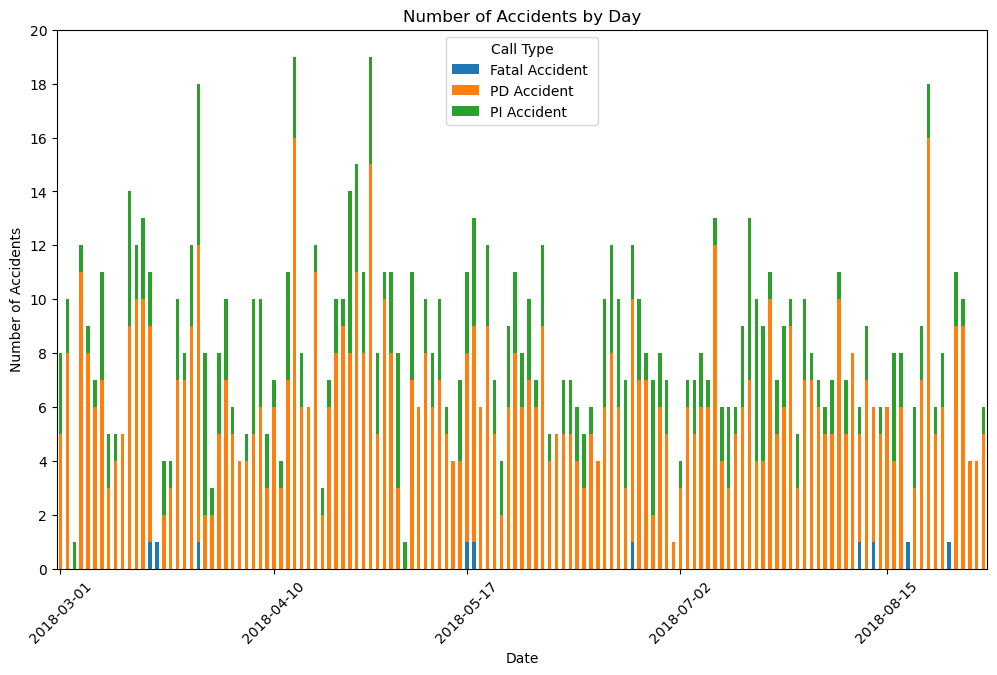

In [58]:

# Assuming you have a pandas DataFrame named 'df' with columns 'ID_Number', 'Timestamp', and 'Type'

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])

# Extract the date from the timestamp
df['Date'] = df['Timestamp'].dt.date

# Group the data by date and type and count the number of accidents
grouped_data = df.groupby(['Date', 'Call Type']).size().reset_index(name='Count')

# Create a pivot table to rearrange the data for plotting
pivot_table = grouped_data.pivot(index='Date', columns='Call Type', values='Count')

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the histogram
pivot_table.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day')

# Set x-axis tick format to show only each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 21, step=2))
# Show the plot
plt.show()


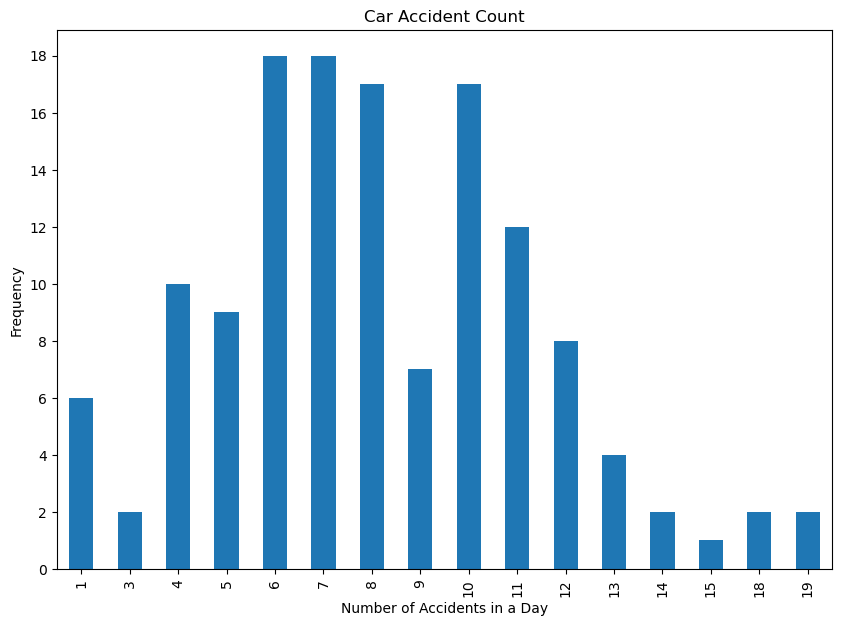

In [65]:
# Group the dataframe by the date and call type, and count the number of accidents per group
grouped = df.groupby([df['Date'], 'Call Type']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 7))

# Calculate the total count of accidents per day
grouped['Total_Count'] = grouped.sum(axis=1)

# Reset the index of the grouped dataframe
grouped.reset_index(inplace=True)

# Group the dataframe by the total count and calculate the frequency
grouped2 = grouped.groupby('Total_Count').size()

# Plot the histogram
grouped2.plot(kind='bar')
plt.xlabel('Number of Accidents in a Day')
plt.ylabel('Frequency')
plt.title('Car Accident Count')
plt.yticks(np.arange(0, 19, step=2))
plt.show()